In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/Users/hsuyab/Documents/Spring 2024/RA Staiger/SOAX project/Ayush/combined_filtered_data.csv"

In [2]:
df = pd.read_csv(file_path)

In [3]:
df.head()

,folder_name,file_name,image_path,image_name,iou,ridge,stretch,Original Count,Original Mean Length,Original Median Length,Obtained Count,Obtained Mean Length,Obtained Median Length,MAE Count,MAE Mean Length,MAE Median Length,percentage_error_count
0,AB(101),AB (101) g--ridge0.02000--stretch0.8000.txt,soax_to_image/AB(101)/,AB(101)_0.png,0.204551,0.020,0.8,86,31.240012,18.3165,42,41.285714,23.0,44,10.045703,4.6835,51.162791
1,AB(101),AB (101) g--ridge0.01800--stretch0.4000.txt,soax_to_image/AB(101)/,AB(101)_1.png,0.206201,0.018,0.4,86,31.240012,18.3165,44,39.931818,22.5,42,8.691807,4.1835,48.837209
2,AB(101),AB (101) g--ridge0.02200--stretch0.7000.txt,soax_to_image/AB(101)/,AB(101)_2.png,0.199389,0.022,0.7,86,31.240012,18.3165,35,47.457143,28.0,51,16.217131,9.6835,59.302326
3,AB(101),AB (101) g--ridge0.04800--stretch0.3000.txt,soax_to_image/AB(101)/,AB(101)_3.png,0.114076,0.048,0.3,86,31.240012,18.3165,10,69.600000,55.0,76,38.359988,36.6835,88.372093
4,AB(101),AB (101) g--ridge0.01800--stretch0.8000.txt,soax_to_image/AB(101)/,AB(101)_4.png,0.209337,0.018,0.8,86,31.240012,18.3165,46,39.021739,21.0,40,7.781728,2.6835,46.511628


In [4]:
#create a list of tuples of (ridge, stretch) values
ridges = df['ridge'].values
stretches = df['stretch'].values

#zip them together as tuple
rs_params = list(zip(ridges, stretches))


In [5]:
#use collections to get a count frequency of each tuple
from collections import Counter
rs_params_count = Counter(rs_params)
print(rs_params_count)

Counter({(0.012, 0.4): 28, (0.046, 0.5): 28, (0.044, 0.6): 28, (0.01, 0.7): 28, (0.038, 0.6): 28, (0.042, 0.5): 28, (0.016, 0.4): 28, (0.014, 0.7): 28, (0.04, 0.6): 28, (0.042, 0.9): 28, (0.016, 0.8): 28, (0.046, 0.3): 28, (0.034, 0.9): 28, (0.03, 0.3): 28, (0.034, 0.5): 28, (0.036, 0.6): 28, (0.026, 0.7): 28, (0.048, 0.9): 28, (0.024, 0.4): 28, (0.024, 0.8): 28, (0.048, 0.5): 28, (0.036, 0.4): 28, (0.034, 0.7): 28, (0.036, 0.8): 28, (0.026, 0.9): 28, (0.022, 0.3): 28, (0.048, 0.7): 28, (0.024, 0.6): 28, (0.026, 0.5): 28, (0.01, 0.3): 28, (0.014, 0.9): 28, (0.04, 0.8): 28, (0.014, 0.5): 28, (0.04, 0.4): 28, (0.028, 0.3): 28, (0.042, 0.7): 28, (0.016, 0.6): 28, (0.044, 1.0): 28, (0.014, 1.0): 28, (0.046, 1.0): 28, (0.016, 1.0): 28, (0.01, 1.0): 28, (0.04, 1.0): 28, (0.012, 1.0): 28, (0.042, 1.0): 28, (0.02, 0.8): 27, (0.018, 0.4): 27, (0.022, 0.7): 27, (0.048, 0.3): 27, (0.018, 0.8): 27, (0.02, 0.4): 27, (0.03, 0.5): 27, (0.032, 0.6): 27, (0.03, 0.9): 27, (0.022, 1.0): 27, (0.034, 0.3):

In [6]:
#get a list of unique tuples and store it in 'params'
params = list(rs_params_count.keys())
print(params)

[(0.02, 0.8), (0.018, 0.4), (0.022, 0.7), (0.048, 0.3), (0.018, 0.8), (0.02, 0.4), (0.03, 0.5), (0.032, 0.6), (0.03, 0.9), (0.022, 1.0), (0.034, 0.3), (0.012, 0.8), (0.046, 0.9), (0.028, 0.7), (0.042, 0.3), (0.012, 0.4), (0.046, 0.5), (0.038, 1.0), (0.044, 0.6), (0.01, 0.7), (0.02, 1.0), (0.038, 0.6), (0.044, 0.4), (0.01, 0.5), (0.012, 0.6), (0.046, 0.7), (0.026, 1.0), (0.028, 0.9), (0.028, 0.5), (0.014, 0.3), (0.044, 0.8), (0.01, 0.9), (0.038, 0.4), (0.038, 0.8), (0.02, 0.6), (0.022, 0.5), (0.022, 0.9), (0.018, 0.6), (0.026, 0.3), (0.024, 1.0), (0.032, 0.8), (0.032, 0.4), (0.03, 0.7), (0.028, 1.0), (0.042, 0.5), (0.016, 0.4), (0.014, 0.7), (0.04, 0.6), (0.042, 0.9), (0.016, 0.8), (0.03, 1.0), (0.046, 0.3), (0.034, 0.9), (0.03, 0.3), (0.034, 0.5), (0.036, 0.6), (0.026, 0.7), (0.032, 1.0), (0.048, 0.9), (0.024, 0.4), (0.024, 0.8), (0.048, 0.5), (0.036, 0.4), (0.034, 1.0), (0.034, 0.7), (0.036, 0.8), (0.026, 0.9), (0.022, 0.3), (0.048, 0.7), (0.024, 0.6), (0.026, 0.5), (0.036, 1.0), (0.0

In [7]:
df.head()

,folder_name,file_name,image_path,image_name,iou,ridge,stretch,Original Count,Original Mean Length,Original Median Length,Obtained Count,Obtained Mean Length,Obtained Median Length,MAE Count,MAE Mean Length,MAE Median Length,percentage_error_count
0,AB(101),AB (101) g--ridge0.02000--stretch0.8000.txt,soax_to_image/AB(101)/,AB(101)_0.png,0.204551,0.020,0.8,86,31.240012,18.3165,42,41.285714,23.0,44,10.045703,4.6835,51.162791
1,AB(101),AB (101) g--ridge0.01800--stretch0.4000.txt,soax_to_image/AB(101)/,AB(101)_1.png,0.206201,0.018,0.4,86,31.240012,18.3165,44,39.931818,22.5,42,8.691807,4.1835,48.837209
2,AB(101),AB (101) g--ridge0.02200--stretch0.7000.txt,soax_to_image/AB(101)/,AB(101)_2.png,0.199389,0.022,0.7,86,31.240012,18.3165,35,47.457143,28.0,51,16.217131,9.6835,59.302326
3,AB(101),AB (101) g--ridge0.04800--stretch0.3000.txt,soax_to_image/AB(101)/,AB(101)_3.png,0.114076,0.048,0.3,86,31.240012,18.3165,10,69.600000,55.0,76,38.359988,36.6835,88.372093
4,AB(101),AB (101) g--ridge0.01800--stretch0.8000.txt,soax_to_image/AB(101)/,AB(101)_4.png,0.209337,0.018,0.8,86,31.240012,18.3165,46,39.021739,21.0,40,7.781728,2.6835,46.511628


## Data Analaysis

In [38]:
#read the comparison dataset
df2 = pd.read_csv("/Users/hsuyab/Documents/Spring 2024/RA Staiger/SOAX project/Atharva/SOAX analysis/ComparisonDataset_final.csv")
#selecting the columns to filter the df2 data based upon
filterCols = ['filename','ridge', 'stretch','Original Count','Original Median Length',  'Original Median Intensity',
'Obtained Count', 'Obtained Median Length', 'Obtained Median Intensity']
#filtering the data
data = df2[filterCols].copy()

#create a list of tuples of (ridge, stretch) values
ridges = data['ridge'].values
stretches = data['stretch'].values

#zip them together as tuple
rs_params = list(zip(ridges, stretches))
#count frequency of each tuple
rs_params_count = Counter(rs_params)
#get a list of unique tuples and store it in 'params'
params = list(rs_params_count.keys())

In [39]:
data.shape

(3040, 9)

In [40]:
data.groupby(['ridge', 'stretch']).size()

ridge  stretch
0.010  0.3        19
       0.4        19
       0.5        19
       0.6        19
       0.7        19
                  ..
0.048  0.6        19
       0.7        19
       0.8        19
       0.9        19
       1.0        19
Length: 160, dtype: int64

In [41]:
data.groupby(['filename']).size()

filename
AB(101)    160
AB(104)    160
AB(11)     160
AB(12)     160
AB(24)     160
AB(31)     160
AB(5)      160
AB(51)     160
AB(64)     160
BB(109)    160
BB(12)     160
BB(17)     160
BB(18)     160
BB(20)     160
BB(26)     160
BB(4)      160
BB(54)     160
BB(59)     160
BB(62)     160
dtype: int64

In [42]:
#select a random value that has AB in it from this list(data['filename'].unique())
import random
random.seed(0)
f_ab = random.choice([i for i in list(data['filename'].unique()) if 'AB' in i])
f_bb = random.choice([i for i in list(data['filename'].unique()) if 'BB' in i])

In [43]:
print(f_ab, f_bb)

AB(64) BB(109)


In [44]:
data_original = data.copy()

In [46]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to calculate RMSE
def calculate_rmse(original, obtained):
    return np.sqrt(mean_squared_error(original, obtained))

# Calculate RMSE for Count, Length, and Intensity
data['RMSE Count'] = calculate_rmse(data['Original Count'], data['Obtained Count'])
data['RMSE Length'] = calculate_rmse(data['Original Median Length'], data['Obtained Median Length'])
data['RMSE Intensity'] = calculate_rmse(data['Original Median Intensity'], data['Obtained Median Intensity'])

In [49]:
data['RMSE Combined'] = (data['RMSE Count'] + data['RMSE Length'] + data['RMSE Intensity'])/3

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# For heatmap, we need to pivot the table to get ridge and stretch as axes and RMSE values as data
# Preparing datasets for heatmaps
def prepare_heatmap_data(data, value_column):
    heatmap_data = data.groupby(['ridge', 'stretch'])[value_column].mean().unstack().fillna(0)
    return heatmap_data

# # Prepare heatmap data for %RMSE Error of Count, Length, and Intensity
# heatmap_count = prepare_heatmap_data(data, '%RMSE Count')
# heatmap_length = prepare_heatmap_data(data, '%RMSE Length')
# heatmap_intensity = prepare_heatmap_data(data, '%RMSE Intensity')

In [51]:
# data
# agg_data

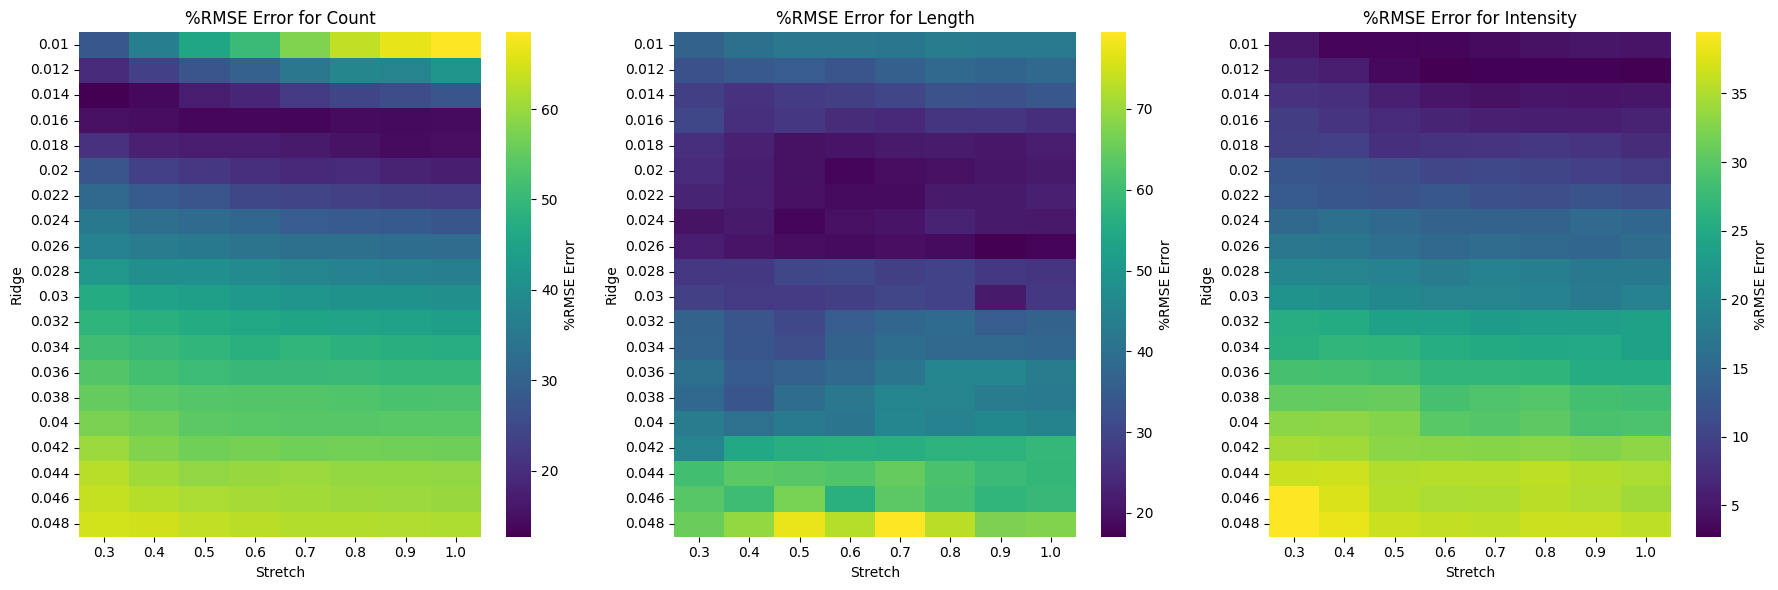

In [34]:
# Correcting approach to calculate RMSE errors correctly for each parameter set

# Function to calculate RMSE and then percentage RMSE for Count, Length, Intensity for each unique set of parameters
def calculate_percent_rmse(data):
    data['RMSE Count'] = (data['Obtained Count'] - data['Original Count']) ** 2
    data['RMSE Length'] = (data['Obtained Median Length'] - data['Original Median Length']) ** 2
    data['RMSE Intensity'] = (data['Obtained Median Intensity'] - data['Original Median Intensity']) ** 2
    
    # Aggregating RMSE by filename and then calculating percentage
    agg_data = data.groupby(['filename', 'ridge', 'stretch']).agg({
        'Original Count': 'mean',
        'Original Median Length': 'mean',
        'Original Median Intensity': 'mean',
        'RMSE Count': 'mean',
        'RMSE Length': 'mean',
        'RMSE Intensity': 'mean'
    }).reset_index()
    
    agg_data['%RMSE Count'] = np.sqrt(agg_data['RMSE Count']) / agg_data['Original Count'] * 100
    agg_data['%RMSE Length'] = np.sqrt(agg_data['RMSE Length']) / agg_data['Original Median Length'] * 100
    agg_data['%RMSE Intensity'] = np.sqrt(agg_data['RMSE Intensity']) / agg_data['Original Median Intensity'] * 100
    
    return agg_data

agg_data = calculate_percent_rmse(data)

# Preparing heatmap data for %RMSE Error of Count, Length, and Intensity from aggregated data
heatmap_data_count = prepare_heatmap_data(agg_data, '%RMSE Count')
heatmap_data_length = prepare_heatmap_data(agg_data, '%RMSE Length')
heatmap_data_intensity = prepare_heatmap_data(agg_data, '%RMSE Intensity')

# Plotting corrected heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(heatmap_data_count, ax=axes[0], cmap="viridis", cbar_kws={'label': '%RMSE Error'})
axes[0].set_title('%RMSE Error for Count')
axes[0].set_xlabel('Stretch')
axes[0].set_ylabel('Ridge')

sns.heatmap(heatmap_data_length, ax=axes[1], cmap="viridis", cbar_kws={'label': '%RMSE Error'})
axes[1].set_title('%RMSE Error for Length')
axes[1].set_xlabel('Stretch')
axes[1].set_ylabel('Ridge')

sns.heatmap(heatmap_data_intensity, ax=axes[2], cmap="viridis", cbar_kws={'label': '%RMSE Error'})
axes[2].set_title('%RMSE Error for Intensity')
axes[2].set_xlabel('Stretch')
axes[2].set_ylabel('Ridge')

plt.tight_layout()
plt.show()


In [35]:

# # Calculate percentage RMSE for each filename type
# percent_rmse = data.groupby('filename').apply(lambda x: pd.Series({
#     '%RMSE Count': 100 * x['RMSE Count'].mean() / x['Original Count'].mean(),
#     '%RMSE Length': 100 * x['RMSE Length'].mean() / x['Original Median Length'].mean(),
#     '%RMSE Intensity': 100 * x['RMSE Intensity'].mean() / x['Original Median Intensity'].mean()
# })).reset_index()

# percent_rmse.head()


In [36]:
# data

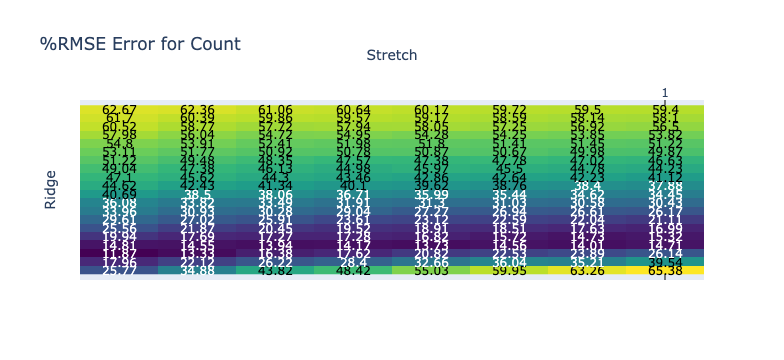

In [17]:
import plotly.figure_factory as ff

# Example for creating an interactive heatmap with Plotly for the %RMSE Count
# Assume 'heatmap_data_count' is your DataFrame with the error values, indexed by 'ridge' and columns as 'stretch'
z = heatmap_data_count.values  # The matrix of values
x = heatmap_data_count.columns.tolist()  # stretch values
y = heatmap_data_count.index.tolist()  # ridge values

# Creating the heatmap
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=np.around(z, decimals=2), colorscale='Viridis')

# Adding titles and labels
fig.update_layout(title='%RMSE Error for Count', xaxis=dict(title='Stretch'), yaxis=dict(title='Ridge'))

# Show the plot
fig.show()


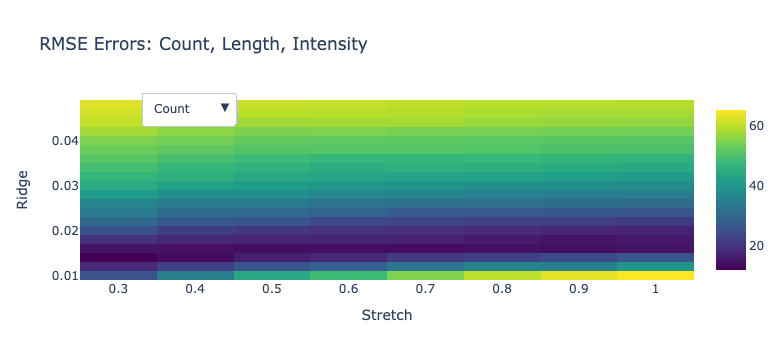

In [18]:
import plotly.graph_objects as go

# Assume 'heatmap_data_*' are your DataFrame objects for each RMSE error type
z_count = heatmap_data_count.values
z_length = heatmap_data_length.values
z_intensity = heatmap_data_intensity.values

x = heatmap_data_count.columns.tolist()  # Should be the same for all three DataFrames
y = heatmap_data_count.index.tolist()  # Ditto

# Initial heatmap
fig = go.Figure(data=go.Heatmap(z=z_count, x=x, y=y, colorscale='Viridis'))

# Update the layout to add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{'z': [z_count], 'x': [x], 'y': [y]}],
                    label="Count",
                    method="update"
                ),
                dict(
                    args=[{'z': [z_length], 'x': [x], 'y': [y]}],
                    label="Length",
                    method="update"
                ),
                dict(
                    args=[{'z': [z_intensity], 'x': [x], 'y': [y]}],
                    label="Intensity",
                    method="update"
                ),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add titles and labels
fig.update_layout(title="RMSE Errors: Count, Length, Intensity", xaxis=dict(title='Stretch'), yaxis=dict(title='Ridge'))

# Show the plot
fig.show()


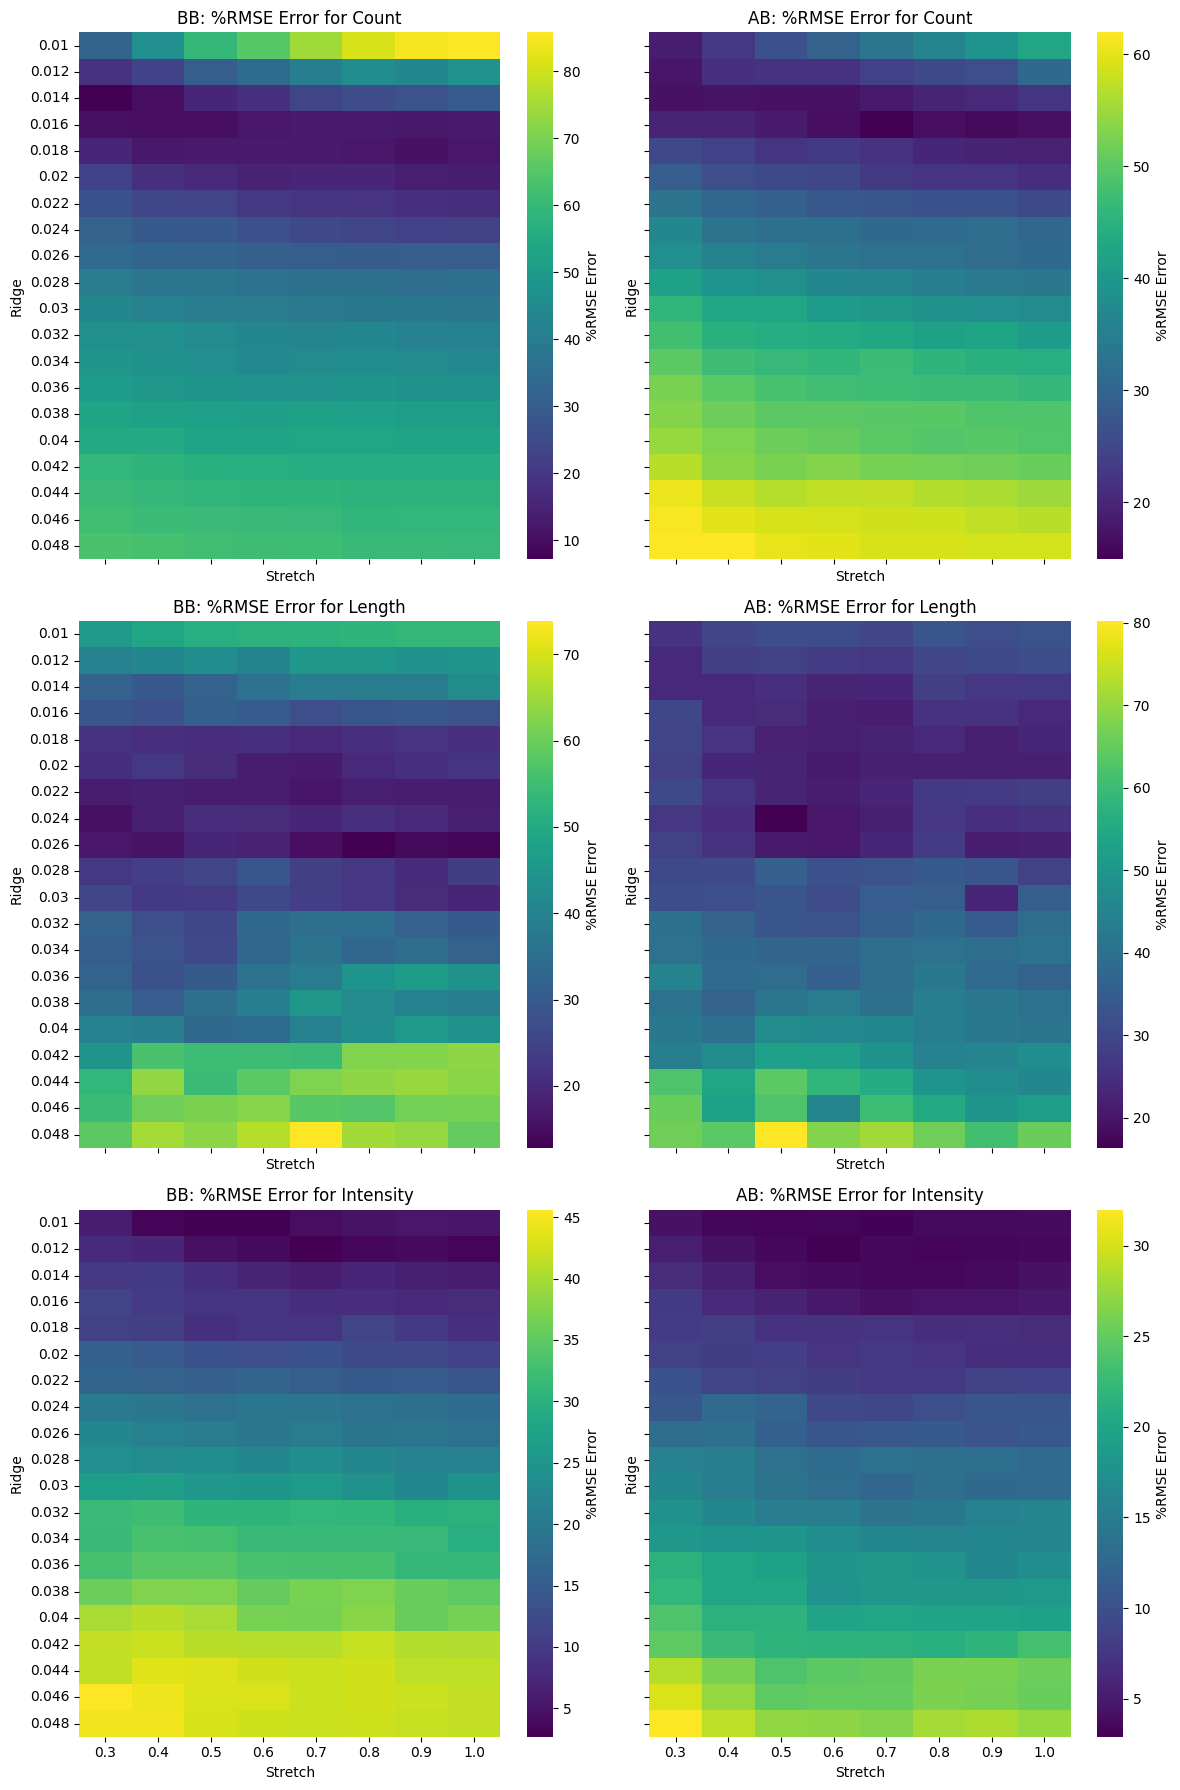

In [19]:
# Filtering the aggregated data for filenames containing "BB" and "AB" specifically
data_bb = agg_data[agg_data['filename'].str.contains('BB')]
data_ab = agg_data[agg_data['filename'].str.contains('AB')]

# Preparing heatmap data specifically for "BB" and "AB" filenames
heatmap_data_count_bb = prepare_heatmap_data(data_bb, '%RMSE Count')
heatmap_data_length_bb = prepare_heatmap_data(data_bb, '%RMSE Length')
heatmap_data_intensity_bb = prepare_heatmap_data(data_bb, '%RMSE Intensity')

heatmap_data_count_ab = prepare_heatmap_data(data_ab, '%RMSE Count')
heatmap_data_length_ab = prepare_heatmap_data(data_ab, '%RMSE Length')
heatmap_data_intensity_ab = prepare_heatmap_data(data_ab, '%RMSE Intensity')

# Plotting heatmaps for "BB" filenames
fig, axes = plt.subplots(3, 2, figsize=(12, 18), sharex='col', sharey='row')

sns.heatmap(heatmap_data_count_bb, ax=axes[0, 0], cmap="viridis", cbar_kws={'label': '%RMSE Error'})
axes[0, 0].set_title('BB: %RMSE Error for Count')
axes[0, 0].set_xlabel('Stretch')
axes[0, 0].set_ylabel('Ridge')

sns.heatmap(heatmap_data_length_bb, ax=axes[1, 0], cmap="viridis", cbar_kws={'label': '%RMSE Error'})
axes[1, 0].set_title('BB: %RMSE Error for Length')
axes[1, 0].set_xlabel('Stretch')
axes[1, 0].set_ylabel('Ridge')

sns.heatmap(heatmap_data_intensity_bb, ax=axes[2, 0], cmap="viridis", cbar_kws={'label': '%RMSE Error'})
axes[2, 0].set_title('BB: %RMSE Error for Intensity')
axes[2, 0].set_xlabel('Stretch')
axes[2, 0].set_ylabel('Ridge')

# Plotting heatmaps for "AB" filenames
sns.heatmap(heatmap_data_count_ab, ax=axes[0, 1], cmap="viridis", cbar_kws={'label': '%RMSE Error'})
axes[0, 1].set_title('AB: %RMSE Error for Count')
axes[0, 1].set_xlabel('Stretch')
axes[0, 1].set_ylabel('Ridge')

sns.heatmap(heatmap_data_length_ab, ax=axes[1, 1], cmap="viridis", cbar_kws={'label': '%RMSE Error'})
axes[1, 1].set_title('AB: %RMSE Error for Length')
axes[1, 1].set_xlabel('Stretch')
axes[1, 1].set_ylabel('Ridge')

sns.heatmap(heatmap_data_intensity_ab, ax=axes[2, 1], cmap="viridis", cbar_kws={'label': '%RMSE Error'})
axes[2, 1].set_title('AB: %RMSE Error for Intensity')
axes[2, 1].set_xlabel('Stretch')
axes[2, 1].set_ylabel('Ridge')

plt.tight_layout()
plt.show()


## Plotting HeatMap for BB

### Count BB

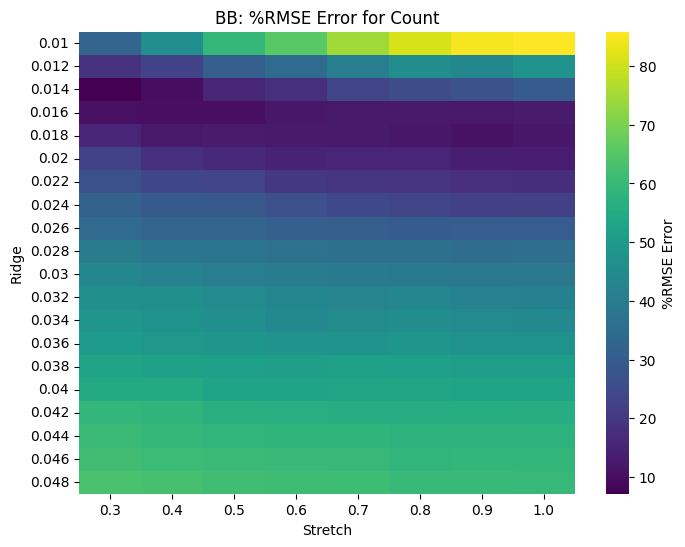

In [20]:
# Plotting heatmaps separately for "BB" filenames

# %RMSE Error for Count - BB
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_count_bb, cmap="viridis", cbar_kws={'label': '%RMSE Error'})
plt.title('BB: %RMSE Error for Count')
plt.xlabel('Stretch')
plt.ylabel('Ridge')
plt.show()

### Length BB

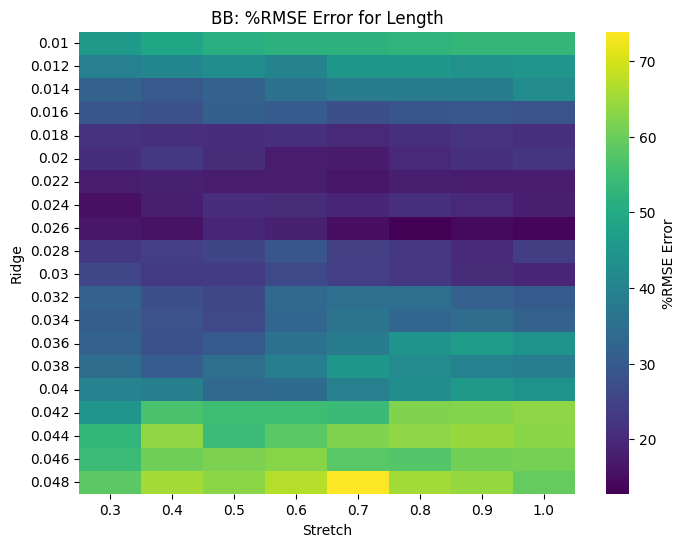

In [21]:

# %RMSE Error for Length - BB
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_length_bb, cmap="viridis", cbar_kws={'label': '%RMSE Error'})
plt.title('BB: %RMSE Error for Length')
plt.xlabel('Stretch')
plt.ylabel('Ridge')
plt.show()

### Intensity BB

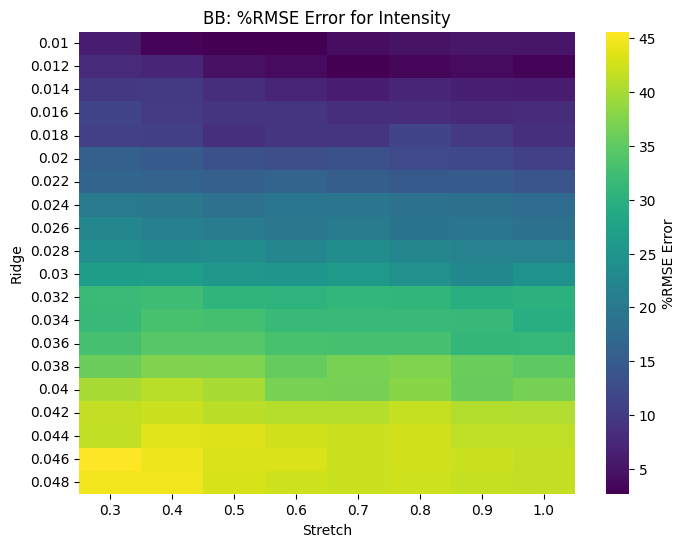

In [22]:

# %RMSE Error for Intensity - BB
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_intensity_bb, cmap="viridis", cbar_kws={'label': '%RMSE Error'})
plt.title('BB: %RMSE Error for Intensity')
plt.xlabel('Stretch')
plt.ylabel('Ridge')
plt.show()

## Plotting HeatMap for AB

### Count AB

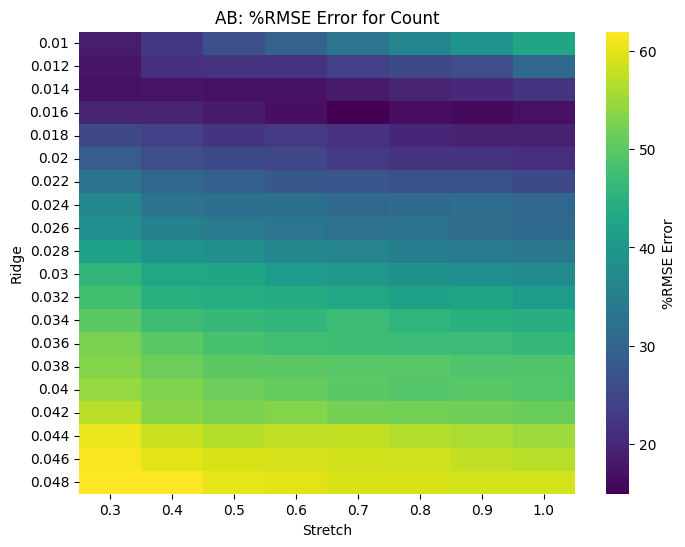

In [23]:

# Plotting heatmaps separately for "AB" filenames

# %RMSE Error for Count - AB
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_count_ab, cmap="viridis", cbar_kws={'label': '%RMSE Error'})
plt.title('AB: %RMSE Error for Count')
plt.xlabel('Stretch')
plt.ylabel('Ridge')
plt.show()


### Length AB

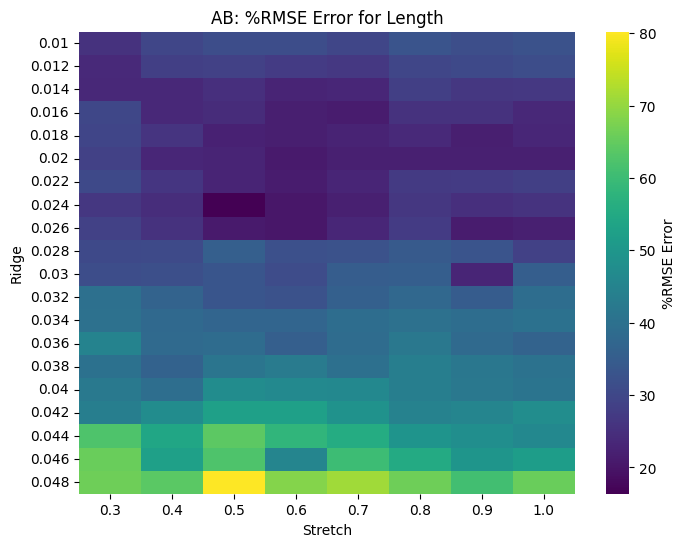

In [24]:

# %RMSE Error for Length - AB
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_length_ab, cmap="viridis", cbar_kws={'label': '%RMSE Error'})
plt.title('AB: %RMSE Error for Length')
plt.xlabel('Stretch')
plt.ylabel('Ridge')
plt.show()

### Intensity AB

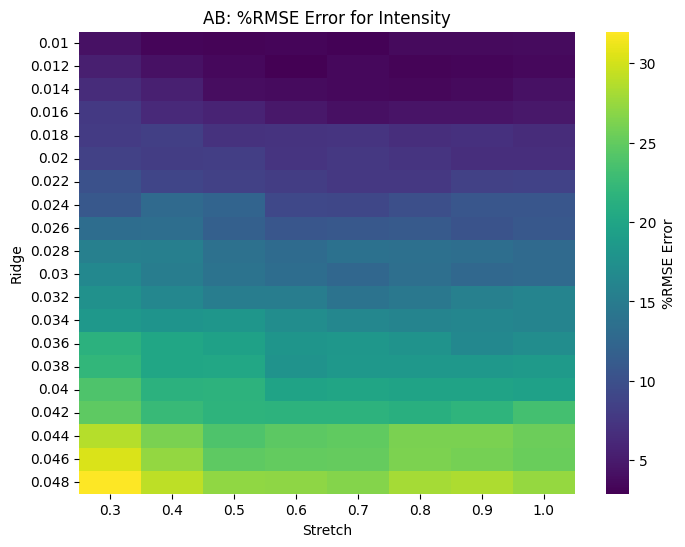

In [25]:

# %RMSE Error for Intensity - AB
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_intensity_ab, cmap="viridis", cbar_kws={'label': '%RMSE Error'})
plt.title('AB: %RMSE Error for Intensity')
plt.xlabel('Stretch')
plt.ylabel('Ridge')
plt.show()


In [26]:
# Function to find the params that minimize the error
def find_min_error_params(data):
    min_error_count = data.loc[data['%RMSE Count'].idxmin(), ['ridge', 'stretch', '%RMSE Count']]
    min_error_length = data.loc[data['%RMSE Length'].idxmin(), ['ridge', 'stretch', '%RMSE Length']]
    min_error_intensity = data.loc[data['%RMSE Intensity'].idxmin(), ['ridge', 'stretch', '%RMSE Intensity']]
    return {
        'Count': min_error_count,
        'Length': min_error_length,
        'Intensity': min_error_intensity
    }

# Find the params for "BB"
min_error_params_bb = find_min_error_params(data_bb)

# Find the params for "AB"
min_error_params_ab = find_min_error_params(data_ab)

min_error_params_bb, min_error_params_ab


({'Count': ridge          0.012
  stretch          0.7
  %RMSE Count      0.0
  Name: 1452, dtype: object,
  'Length': ridge              0.034
  stretch              0.8
  %RMSE Length    0.053362
  Name: 2341, dtype: object,
  'Intensity': ridge                0.012
  stretch                0.9
  %RMSE Intensity    0.00159
  Name: 1934, dtype: object},
 {'Count': ridge          0.01
  stretch         0.7
  %RMSE Count     0.0
  Name: 4, dtype: object,
  'Length': ridge              0.044
  stretch              1.0
  %RMSE Length    0.020517
  Name: 463, dtype: object,
  'Intensity': ridge                 0.012
  stretch                 0.5
  %RMSE Intensity    0.014522
  Name: 10, dtype: object})

For minimizing the %RMSE Error, here are the selected parameter values `(ridge, stretch)` for "BB" and "AB" filenames separately:

### "BB" Filenames
- **Count:**
  - Ridge: 0.012
  - Stretch: 0.7
  - %RMSE Count: 0.0%
- **Length:**
  - Ridge: 0.034
  - Stretch: 0.8
  - %RMSE Length: 0.053%
- **Intensity:**
  - Ridge: 0.012
  - Stretch: 0.9
  - %RMSE Intensity: 0.00159%

### "AB" Filenames
- **Count:**
  - Ridge: 0.01
  - Stretch: 0.7
  - %RMSE Count: 0.0%
- **Length:**
  - Ridge: 0.044
  - Stretch: 1.0
  - %RMSE Length: 0.021%
- **Intensity:**
  - Ridge: 0.012
  - Stretch: 0.5
  - %RMSE Intensity: 0.0145%

These parameter values represent the optimal settings for minimizing the errors in Count, Length, and Intensity for datasets with filenames containing "BB" and "AB" specifically. You can use these parameters to guide your analysis or setup for further experiments. If there's anything else you'd like to explore or need further clarification on, feel free to ask!

In [27]:
# Function to calculate combined error and find the params with the lowest combined error
def find_lowest_combined_error(data):
    data['Combined %RMSE Error'] = data[['%RMSE Count', '%RMSE Length', '%RMSE Intensity']].mean(axis=1)
    min_combined_error = data.loc[data['Combined %RMSE Error'].idxmin(), ['ridge', 'stretch', 'Combined %RMSE Error']]
    return min_combined_error

# Calculate and find the lowest combined error params for "BB"
lowest_combined_error_bb = find_lowest_combined_error(data_bb)

# Calculate and find the lowest combined error params for "AB"
lowest_combined_error_ab = find_lowest_combined_error(data_ab)

lowest_combined_error_bb, lowest_combined_error_ab


(ridge                      0.014
 stretch                      0.5
 Combined %RMSE Error    3.761751
 Name: 1778, dtype: object,
 ridge                     0.018
 stretch                     1.0
 Combined %RMSE Error    4.10274
 Name: 199, dtype: object)

In [36]:
data_ab[(data_ab['ridge']==0.014)&(data_ab['stretch']==0.5)]

,filename,ridge,stretch,Original Count,Original Median Length,Original Median Intensity,RMSE Count,RMSE Length,RMSE Intensity,%RMSE Count,%RMSE Length,%RMSE Intensity,Combined %RMSE Error
18,AB(101),0.014,0.5,86.0,18.3165,16581.6240,529.0,1.733172,1.599219e+05,26.744186,7.187509,2.411720,12.114471
178,AB(104),0.014,0.5,84.0,24.0520,33425.5470,4.0,30.824704,8.164361e+05,2.380952,23.083319,2.703227,9.389166
338,AB(11),0.014,0.5,40.0,38.9920,39907.0840,25.0,99.840064,7.473812e+03,12.500000,25.625769,0.216631,12.780800
498,AB(12),0.014,0.5,34.0,56.6585,19008.4130,25.0,658.358622,7.741051e+05,14.705882,45.286232,4.628648,21.540254
658,AB(24),0.014,0.5,146.0,27.0270,21439.3930,6724.0,12.439729,1.205264e+06,56.164384,13.049913,5.120692,24.778330
818,AB(31),0.014,0.5,70.0,28.0170,25568.9600,16.0,64.272289,2.359369e+05,5.714286,28.614770,1.899699,12.076252
978,AB(5),0.014,0.5,84.0,25.0915,33645.3400,169.0,37.106372,6.810978e+06,15.476190,24.277146,7.756750,15.836695
1138,AB(51),0.014,0.5,96.0,26.9530,39872.0605,4.0,48.344209,1.639793e+07,2.083333,25.796757,10.156075,12.678722
1298,AB(64),0.014,0.5,77.0,40.1260,41605.0390,196.0,172.291876,9.083170e+03,18.181818,32.711957,0.229072,17.040949


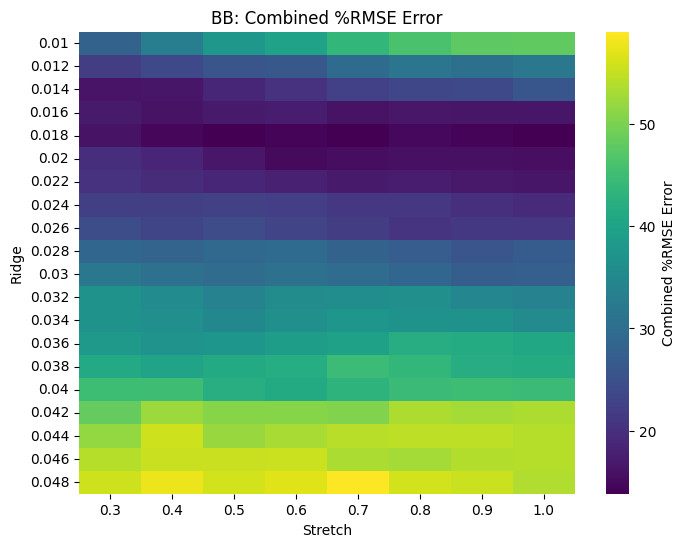

In [28]:
# Preparing heatmap data for the combined %RMSE Error for "BB" and "AB" filenames
heatmap_data_combined_bb = prepare_heatmap_data(data_bb, 'Combined %RMSE Error')
heatmap_data_combined_ab = prepare_heatmap_data(data_ab, 'Combined %RMSE Error')

# Plotting heatmap for the combined %RMSE Error - "BB" filenames
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_combined_bb, cmap="viridis", cbar_kws={'label': 'Combined %RMSE Error'})
plt.title('BB: Combined %RMSE Error')
plt.xlabel('Stretch')
plt.ylabel('Ridge')
plt.show()

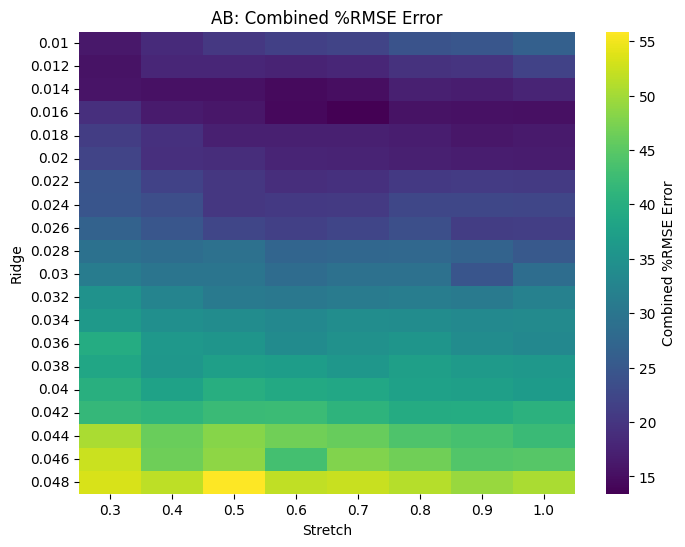

In [29]:

# Plotting heatmap for the combined %RMSE Error - "AB" filenames
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_combined_ab, cmap="viridis", cbar_kws={'label': 'Combined %RMSE Error'})
plt.title('AB: Combined %RMSE Error')
plt.xlabel('Stretch')
plt.ylabel('Ridge')
plt.show()


To find a set of parameters that minimizes the error across all three metrics (Count, Length, and Intensity) simultaneously for each filename group ("BB" and "AB"), a heuristic or optimization approach can be used. A common and straightforward heuristic method is to calculate a combined error score for each parameter set and then choose the one with the lowest score. 

One way to define a combined error score could be to simply average the %RMSE for Count, Length, and Intensity, assuming equal importance of each metric. Alternatively, if certain metrics are more important than others, you could apply weights to each %RMSE before averaging.

Let's calculate a simple average combined error for each parameter set for both "BB" and "AB" filenames and identify the parameters with the lowest combined error.

By calculating a simple average of the %RMSE for Count, Length, and Intensity as a combined error score, we've identified the parameter sets that minimize the error across all three metrics for both "BB" and "AB" filenames:

### "BB" Filenames
- Ridge: 0.014
- Stretch: 0.5
- Combined %RMSE Error: 3.76%

### "AB" Filenames
- Ridge: 0.018
- Stretch: 1.0
- Combined %RMSE Error: 4.10%

These parameters represent the best compromise across all three metrics for minimizing error in the datasets with filenames containing "BB" and "AB", respectively. This heuristic approach provides a balanced solution, considering the performance across all metrics simultaneously. 

In [30]:
# data ab
print(f"Ridge AB: {lowest_combined_error_ab['ridge']}, Stretch AB: {lowest_combined_error_ab['stretch']}")
#filtered data
data_ab[(data_ab['ridge']==lowest_combined_error_ab['ridge'])&(data_ab['stretch']==lowest_combined_error_ab['stretch'])]

Ridge AB: 0.018, Stretch AB: 1.0


,filename,ridge,stretch,Original Count,Original Median Length,Original Median Intensity,RMSE Count,RMSE Length,RMSE Intensity,%RMSE Count,%RMSE Length,%RMSE Intensity,Combined %RMSE Error
39,AB(101),0.018,1.0,86.0,18.3165,16581.6240,1521.0,2.834172,2.016004e+06,45.348837,9.191166,8.562856,21.034287
199,AB(104),0.018,1.0,84.0,24.0520,33425.5470,1.0,4.210704,7.472938e+05,1.190476,8.531515,2.586230,4.102740
359,AB(11),0.018,1.0,40.0,38.9920,39907.0840,9.0,99.840064,5.266553e+06,7.500000,25.625769,5.750601,12.958790
519,AB(12),0.018,1.0,34.0,56.6585,19008.4130,4.0,1066.577622,1.422097e+06,5.882353,57.640954,6.273628,23.265645
679,AB(24),0.018,1.0,146.0,27.0270,21439.3930,7396.0,9.162729,2.690975e+06,58.904110,11.199911,7.651425,25.918482
839,AB(31),0.018,1.0,70.0,28.0170,25568.9600,16.0,25.170289,1.707020e+06,5.714286,17.906985,5.109828,9.577033
999,AB(5),0.018,1.0,84.0,25.0915,33645.3400,484.0,1.191372,3.233269e+07,26.190476,4.350079,16.900361,15.813638
1159,AB(51),0.018,1.0,96.0,26.9530,39872.0605,0.0,89.359209,2.694830e+06,0.000000,35.072163,4.117153,13.063105
1319,AB(64),0.018,1.0,77.0,40.1260,41605.0390,289.0,244.171876,1.912981e+05,22.077922,38.942332,1.051258,20.690504


In [31]:
# data bb
print(f"Ridge BB: {lowest_combined_error_bb['ridge']}, Stretch BB: {lowest_combined_error_bb['stretch']}")
#filtered data
data_bb[(data_bb['ridge']==lowest_combined_error_bb['ridge'])&(data_bb['stretch']==lowest_combined_error_bb['stretch'])]

Ridge BB: 0.014, Stretch BB: 0.5


,filename,ridge,stretch,Original Count,Original Median Length,Original Median Intensity,RMSE Count,RMSE Length,RMSE Intensity,%RMSE Count,%RMSE Length,%RMSE Intensity,Combined %RMSE Error
1458,BB(109),0.014,0.5,42.0,41.1705,22971.1480,1.0,230.144070,1.601816e+07,2.380952,36.847986,17.423028,18.883989
1618,BB(12),0.014,0.5,38.0,41.7730,19705.5010,196.0,410.994529,2.556887e+06,36.842105,48.531348,8.114622,31.162692
1778,BB(17),0.014,0.5,46.0,35.8160,22502.7585,0.0,7.929856,5.932614e+05,0.000000,7.862408,3.422845,3.761751
1938,BB(18),0.014,0.5,32.0,50.5300,15137.1185,49.0,12.460900,1.505035e+06,21.875000,6.985949,8.104573,12.321841
2098,BB(20),0.014,0.5,40.0,29.8895,25472.9950,169.0,47.465210,6.282700e+06,32.500000,23.049900,9.839956,21.796619
2258,BB(26),0.014,0.5,75.0,29.9840,40077.3670,49.0,89.946256,3.730565e+06,9.333333,31.630203,4.819346,15.260961
2418,BB(4),0.014,0.5,55.0,35.3650,17908.5740,0.0,69.973225,9.603530e+05,0.000000,23.653330,5.472105,9.708478
2578,BB(54),0.014,0.5,53.0,45.3600,36398.7300,36.0,206.209600,1.637196e+07,11.320755,31.657848,11.116398,18.031667
2738,BB(59),0.014,0.5,55.0,44.7800,17008.1890,169.0,565.488400,1.950792e+06,23.636364,53.104064,8.211970,28.317466
2898,BB(62),0.014,0.5,31.0,45.5940,15086.0620,36.0,655.052836,1.113000e+06,19.354839,56.134579,6.993130,27.494183
